<a href="https://colab.research.google.com/github/F1ameX/TUSUR_ML/blob/main/TUSUR_HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras as k
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
(X_train, X_test) = (X_train / 255, X_test / 255)
(y_train_cat, y_test_cat) = (k.utils.to_categorical(y_train, num_classes = 10), k.utils.to_categorical(y_test, num_classes = 10))

In [6]:
model = k.Sequential([
    k.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),

    k.layers.BatchNormalization(),
    k.layers.Conv2D(32, (3, 3), activation = 'relu'),
    k.layers.MaxPooling2D(pool_size = (3, 3)),

    k.layers.BatchNormalization(),
    k.layers.Conv2D(32, (3, 3), activation = 'relu'),

    k.layers.BatchNormalization(),
    k.layers.MaxPooling2D(pool_size = (2, 2)),
    k.layers.Dropout(0.2),

    k.layers.Flatten(),

    k.layers.Dense(256, activation = 'relu'),
    k.layers.BatchNormalization(),
    k.layers.Dropout(0.5),

    k.layers.Dense(128, activation = 'relu'),
    k.layers.BatchNormalization(),
    k.layers.Dropout(0.5),

    k.layers.Dense(64, activation = 'relu'),
    k.layers.BatchNormalization(),
    k.layers.Dropout(0.5),

    k.layers.Dense(32, activation = 'relu'),
    k.layers.BatchNormalization(),

    k.layers.Dense(10, activation = 'softmax')

])
model.compile(optimizer = 'adam',  loss='categorical_crossentropy',metrics=['acc'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 9, 9, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          73,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,242 (543.91 KB)

 Trainable params: 138,090 (539.41 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = 'loss',
    patience = 5,
    restore_best_weights = True
)

hist = model.fit(X_train, y_train_cat, epochs = 40, callbacks = [early_stopping])

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - acc: 0.3673 - loss: 1.6765
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 83ms/step - acc: 0.4890 - loss: 1.4253
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - acc: 0.5469 - loss: 1.3025
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - acc: 0.5817 - loss: 1.2143
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - acc: 0.6010 - loss: 1.1707
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 83ms/step - acc: 0.6177 - loss: 1.1342
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 81ms/step - acc: 0.6379 - loss: 1.0766
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 83ms/step - acc: 0.6399 - loss: 1.0647
Epoch 9/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 81ms/step - acc: 0.6527 - loss: 1.0321
Epoch 10/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 85ms/step - acc: 0.6580 - loss: 1.0164
Epoch 11/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 82ms/step - acc: 0.6636 - loss: 0.9931
Epoch 12/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 84ms

In [9]:
model.evaluate(X_test, y_test_cat, verbose = 2)

313/313 - 5s - 17ms/step - acc: 0.7549 - loss: 0.7240


[0.7239956855773926, 0.7548999786376953]

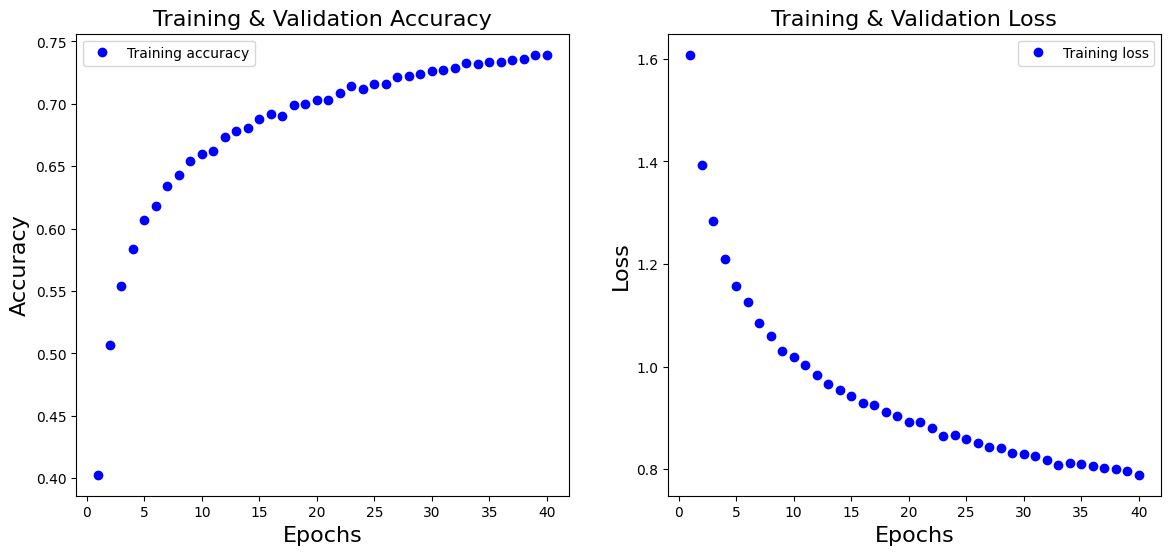

In [14]:
import matplotlib.pyplot as plt

history_dict = hist.history
loss_values = history_dict['loss']
accuracy = history_dict['acc']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()


ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()
plt.show()